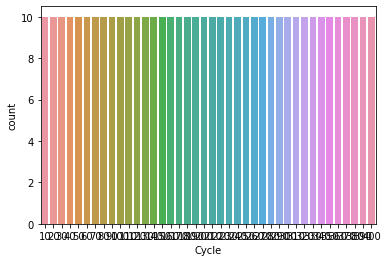

Accuracy is: 0.5375
Confusion Matrix is:  [[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 2]]


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
data = pd.read_csv('/content/dataset1.csv')
data.head()
data.shape
X = data.iloc[:,:-1]
X.head()
y = data.iloc[:,-1]
y.head()
data['Cycle'].value_counts()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
sns.countplot(x='Cycle',data=data)
plt.show()
X_train.shape
X_train.head()
y_test.shape
y_test.head()


from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
filename = 'model1.sav'
pickle.dump(model, open(filename, 'wb'))
y_pred = model.predict(X_test)
from sklearn import metrics
acc=(metrics.accuracy_score(y_pred,y_test))
print("Accuracy is:",acc)
print("Confusion Matrix is: ",metrics.confusion_matrix(y_pred,y_test))

In [5]:
import pickle
import urllib.request
import json
from time import sleep
conn = urllib.request.urlopen("https://api.thingspeak.com/channels/596974/feeds.json?results=1")
response = conn.read()
print ("http status code=%s" % (conn.getcode()))
data=json.loads(response)
x=int(data['feeds'][0]['entry_id'])
y=x
conn.close()
while x==y:
  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/596974/feeds.json?results=1")
  response = conn.read()
  #print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  y=int(data['feeds'][0]['entry_id'])
  conn.close()

conn = urllib.request.urlopen("https://api.thingspeak.com/channels/596974/feeds.json?results=1")
response = conn.read()
print ("http status code=%s" % (conn.getcode()))
data=json.loads(response)
a=float(data['feeds'][0]['field4'])
b=float(data['feeds'][0]['field5'])
c=1
conn.close()
filename = 'model1.sav'
loaded_model = pickle.load(open(filename, 'rb'))
person_reports = [[a,b,c]]
disease_predicted = loaded_model.predict(person_reports)
print("ANALYSING....")
disease_predicted = loaded_model.predict(person_reports)
x=int(disease_predicted[0])
x=400-x
print(x,"cycles remaining")
y=(x*100)/400
print(y ,"% of lifetime remaining")
conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=2OZI44V9T9W4G4DP&field4="+str(y)+"_life_cycle")



http status code=200
http status code=200
ANALYSING....
390 cycles remaining
97.5 % of lifetime remaining


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
